# COGS 108 - An Exploratory Analysis of Diet and COVID Infection Rates

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [`X`] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Arnav Tayal
- Chaewon Heo
- Martha Chow
- Zhiyi Zhu

<a id='research_question'></a>
# Research Question

Main question: Are characteristics of an individual’s diet (such as the amount of calories, macronutrients, and/or micronutrients) correlated with their likelihood of contracting COVID-19? 

Sub-questions: Can we correlate diet type (eg. vegetarian, keto, pescetarian) with an individual’s likelihood of contracting COVID-19? Which characteristic is the strongest predictor? 

<a id='background'></a>

## Background & Prior Work

With the prevalence of the COVID-19 in recent years, multiple actions are taken to protect people from getting infected and help people recover. One possible action is to eat a healthy diet, since it is commonly heard that eating a healthy diet has multiple benefits, such as lowering risks for multiple common diseases, supporting muscle, and boosting immunity [^1]. According to the World Health Organization, a healthy diet is balanced calorically with energy expenditure; low in saturated fats, trans fats, free sugar, salt; and high in vegetables, fruits, whole grains, and legumes). [^2]

Multiple studies have shown that there are correlations between certain dietary components and general health. For example, dietary fatty acids are found to have a significant role in immune responses and thus support immunity [^3]; Consuming a good source of protein at least twice a day can help maintaining strong respiratory muscles [^4], and high levels of certain vegetables are essential for sustaining intestinal immune function [^5]. However, these findings do not directly address whether there’s a correlation between certain dietary components and COVID-19.

There are existing efforts to study healthy eating as a non-pharmaceutical intervention for COVID-19 [^6]. A dataset that details the typical characteristics of a country’s diet, as well as its obesity and COVID-19 rates, has been compiled. It is based on findings from organizations such as the UN and Johns Hopkins university. Potential concerns with the data include accuracy, inconsistencies in units, and collection from different years (which could make comparisons unfair). Notable conclusions from analysis so far include that "COVID-19 confirmed percentage is less in the countries where Animal Product Protein consumption is low like India", "countries where obesity is low COVID-19 cases are low", and "​​ The countries with the most recovered rate seem to consume more vegetables than people on average".

It is worth noting that existing analysis on the dataset is incomplete, scattered, and presented in a confusing way (eg. relevant information like vegetable consumptions vs recovery rate is mixed in with irrelevant information like vegetable consumption vs alcohol consumption). There also  seems to be a stronger emphasis on establishing the relationship between obesity and COVID-19 rates rather than diet and COVID-19 rates.
[^1]: "Benefits of Healthy Eating | Nutrition | DNPAO." *CDC*, 16 May 2021, https://www.cdc.gov/nutrition/resources-publications/benefits-of-healthy-eating.html. Accessed 22 April 2022. 
[^2]: "Healthy diet." *WHO | World Health Organization*, 29 April 2020, https://www.who.int/news-room/fact-sheets/detail/healthy-diet. Accessed 22 April 2022. 
[^3]: Radzikowska, Urszula. "The Influence of Dietary Fatty Acids on Immune Responses." *MDPI*, 2019, https://doi.org/10.3390/nu11122990. Accessed 22 April 2022.
[^4]: "Nutrition and COPD." *American Lung Association*, https://www.lung.org/lung-health-diseases/lung-disease-lookup/copd/living-with-copd/nutrition. Accessed 22 April 2022.
[^5]: Hooper, Lora V. "You AhR what you eat: linking diet and immunity." *Cell* vol. 147,3 (2011): 489-91. doi:10.1016/j.cell.2011.10.004 
[^6]: Ren, Maria. "COVID-19 Healthy Diet Dataset." *Kaggle*, https://www.kaggle.com/datasets/mariaren/covid19-healthy-diet-dataset. Accessed 22 April 2022. 

# Hypothesis


The characteristics of an individual’s diet is correlated with the likelihood of COVID-19 infection. Diets types that are correlated with decreased incidence of COVID-19 infection have common characteristics. 
Justification: based on past research, those who consume a healthy diet tend to be less likely to contract disease. As such, we predict that COVID-19 will fit this trend. 

Of all characteristics, amount of calories (units TBC, likely to be per year) is the most accurate predictor of likelihood to contract COVID-19.  
Justification: Although calories do not necessarily represent the quality of one’s diet, it is generally the case that a diet high in calories is a poor diet. We can’t say this with as much confidence for other characteristics that are more ‘specific’ (calories can come from a range of nutrients, fat content is only based on one type of nutrient).

# Dataset(s)


- Dataset Name: Supply_Quantity_Kg
- Link to the dataset:https://github.com/mariarencode/COVID_19_Dataset_Challenge/tree/master/Food_Supply_Quantity_Kg
- Number of observations: 174

Each file in this dataset records the amount of a particular food category of each country in kilograms/capita/yr

- Dataset Name: Fat Supply
- Link to the dataset: https://github.com/mariarencode/COVID_19_Dataset_Challenge/tree/master/Fat_Supply
- Number of observations: 174

Each file in this dataset records the amount of fat in a particular food category of each country in grams/capita/yr

- Dataset Name: Protein Supply
- Link to the dataset: https://github.com/mariarencode/COVID_19_Dataset_Challenge/tree/master/Protein_Supply
- Number of observations: 174

Each file in this dataset records the amount of protein in a particular food category of each country in grams/capita/yr

We plan to pick particular columns from these datasets and combine them using the merge function in pandas, each row will be unique to a country 

# Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# packages for importing files
import os
import glob

__Get the add the Confirmed,Deaths,Recovered,Active,Population to the dataframe; those are directly extracted from the dataframe that records the precentages. Due to the time dependence of active COVID cases, it will be excluded from analysis. Beside the population, the unit for the other 3 quantitative columns are in percentages.__

In [2]:
df_covid = pd.read_csv('Food_Supply_Quantity_kg_Data.csv',usecols=['Country','Confirmed','Deaths','Recovered','Population'])
df_covid.head(6)

,Country,Confirmed,Deaths,Recovered,Population
0,Afghanistan,0.142134,0.006186,0.123374,38928000.0
1,Albania,2.967301,0.050951,1.792636,2838000.0
2,Algeria,0.244897,0.006558,0.167572,44357000.0
3,Angola,0.061687,0.001461,0.056808,32522000.0
4,Antigua and Barbuda,0.293878,0.007143,0.190816,98000.0
5,Argentina,4.356147,0.108227,3.905192,45377000.0


# Data Cleaning

__Process data for food quantity (unit: kg/capita/yr)__

In [3]:
# read in most csvs as a list
path = 'Food_Supply_Quantity_Kg'
all_files = glob.glob(os.path.join(path, "*.csv"))

In [4]:
# function that standardize food name; all lowercase + no space + no special character
def getName(n):
    name = n.replace(' ','_')
    name = name.replace('-','')
    name = name.replace(',','')
    name = name.replace('&','')
    name = name.replace('__','_')
    return name.lower()

In [5]:
# read in the first csv in the directory so we can merge other csvs with it
col_list = ["Area", "Item", "Value"] # we only need the country and the quantity of food from the file
df_quantity = pd.read_csv(all_files[0], usecols=col_list)
name = getName(df_quantity.loc[0].at["Item"])
df_quantity = df_quantity.drop('Item', 1)
df_quantity.columns = ['country',name]

# merge all csvs in the directory into df_quantity
for i in all_files[1:len(all_files)]:
    # extract the name of the file
    tmp = pd.read_csv(i, usecols=col_list)
    name = getName(tmp.loc[0].at["Item"])
    tmp = tmp.drop('Item', 1)
    tmp.columns = ['country',name] 
    df_quantity = pd.merge(df_quantity,tmp,on ='country', how='outer')

/var/folders/9p/qyg5n1n16k759vt2__6rzxl40000gn/T/ipykernel_4402/1764355593.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_quantity = df_quantity.drop('Item', 1)
/var/folders/9p/qyg5n1n16k759vt2__6rzxl40000gn/T/ipykernel_4402/1764355593.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
/var/folders/9p/qyg5n1n16k759vt2__6rzxl40000gn/T/ipykernel_4402/1764355593.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
/var/folders/9p/qyg5n1n16k759vt2__6rzxl40000gn/T/ipykernel_4402/1764355593.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
/var/folders/9p/q

In [6]:
# we also need the Animal Product and Vegetal Product csvs that are in different forms, so add them to dataframe seperately
animal = pd.read_csv('FAOSTAT_food_kg_animal.csv')
animal.columns = ['country','animal_products'] 
vegetal_prod = pd.read_csv('FAOSTAT_food_kg_vegetal_prod.csv')
vegetal_prod.columns = ['country','vegetal_products']
df_quantity = pd.merge(df_quantity,animal,on ='country', how='outer')
df_quantity = pd.merge(df_quantity,vegetal_prod,on ='country', how='outer')

In [7]:
# sort the columns, with country at the first column, and the food columns in alphabetical order
df_quantity = df_quantity.sort_index(axis=1)
first_column = df_quantity.pop('country')
df_quantity.insert(0, 'country', first_column)

# fill na with 0
df_quantity = df_quantity.fillna(0)

In [8]:
df_quantity.head(6)

,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,meat,...,pulses,spices,starchy_roots,stimulants,sugar_crops,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products
0,Afghanistan,0.01,1.41,67.42,0.0,177.30,1.50,0.25,38.23,8.59,...,2.11,0.41,6.29,2.20,0.0,9.64,0.55,3.82,48.34,289.89
1,Albania,42.15,3.42,473.16,0.0,145.76,14.66,5.36,171.08,47.51,...,6.00,0.02,45.62,2.66,0.0,38.74,3.82,8.22,296.86,787.33
2,Algeria,4.33,0.45,153.89,0.0,218.56,8.43,3.86,101.92,18.06,...,7.64,0.89,66.04,3.54,0.0,29.30,1.84,16.47,186.08,644.82
3,Angola,66.33,0.64,56.27,0.0,104.01,0.67,20.22,68.52,23.49,...,7.43,0.01,206.80,0.58,0.0,21.12,0.07,7.38,26.31,514.68
4,Antigua and Barbuda,45.29,0.11,210.99,0.0,75.93,2.88,52.54,136.07,72.04,...,2.33,1.93,18.39,1.98,0.0,49.07,0.32,10.26,69.01,421.99
5,Argentina,66.28,3.47,300.48,0.0,130.63,15.50,7.29,93.87,109.38,...,0.82,0.19,47.25,6.80,0.0,47.43,0.31,14.82,67.57,476.16


In [9]:
df_quantity.shape

(173, 24)

__Process data for fat ( original unit: g/capita/day; will be converted to kg/capita/year)__

In [10]:
# function that converts g/capita/day to kg/capita/yr 
# TODO: someone check if this is correct
def standUnit(x):
    # g -> kg: / 1000
    # day -> year: * 365
    return x / 1000 * 365

In [11]:
# read in most csvs as a list
path = 'Fat_Supply'
all_files = glob.glob(os.path.join(path, "*.csv"))

# read in the first csv in the directory so we can merge other csvs with it
col_list = ["Area", "Item", "Value"] # we only need the country and the quantity of food from the file
df_fat = pd.read_csv(all_files[0], usecols=col_list)
name = getName(df_fat.loc[0].at["Item"])
df_fat = df_fat.drop('Item', 1)
df_fat.columns = ['country',name]

# merge all csvs in the directory into df_fat
for i in all_files[1:len(all_files)]:
    # extract the name of the file
    tmp = pd.read_csv(i, usecols=col_list)
    name = getName(tmp.loc[0].at["Item"])
    tmp = tmp.drop('Item', 1)
    tmp.columns = ['country',name] 
    df_fat = pd.merge(df_fat,tmp,on ='country', how='outer')
    
# sort the columns, with country at the first column, and the food columns in alphabetical order
df_fat = df_fat.sort_index(axis=1)
first_column = df_fat.pop('country')
df_fat.insert(0, 'country', first_column)

# replace na with 0
df_fat = df_fat.fillna(0)

/var/folders/9p/qyg5n1n16k759vt2__6rzxl40000gn/T/ipykernel_4402/3306572841.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_fat = df_fat.drop('Item', 1)
/var/folders/9p/qyg5n1n16k759vt2__6rzxl40000gn/T/ipykernel_4402/3306572841.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
/var/folders/9p/qyg5n1n16k759vt2__6rzxl40000gn/T/ipykernel_4402/3306572841.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
/var/folders/9p/qyg5n1n16k759vt2__6rzxl40000gn/T/ipykernel_4402/3306572841.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
/var/folders/9p/qyg5n1n16k7

In [12]:
# convert g/capita/day to kg/capita/yr
df_fat[df_fat.columns[1:len(df_fat.columns)]] = df_fat[df_fat.columns[1:len(df_fat.columns)]].applymap(standUnit)
df_fat

,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,meat,...,pulses,spices,starchy_roots,stimulants,sugar_crops,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products
0,Afghanistan,0.00000,1.39065,4.83625,0.00000,1.79580,0.15330,0.00730,0.09490,1.36875,...,0.04380,0.06205,0.01095,0.02190,0.0,0.0,0.16790,3.81790,0.08030,6.34005
1,Albania,0.00000,2.93460,27.48085,0.00000,2.29585,1.41255,0.12410,0.55115,7.50805,...,0.09855,0.00000,0.04380,0.45260,0.0,0.0,0.78840,7.93875,0.55845,15.45775
2,Algeria,0.00000,0.52195,8.38770,0.00000,2.44550,0.70810,0.11680,0.33580,2.26665,...,0.15695,0.09125,0.06570,0.16790,0.0,0.0,0.50005,15.91765,0.29930,20.70280
3,Angola,0.00000,0.46720,5.44580,0.00000,2.33235,0.05475,0.50370,0.12410,3.92375,...,0.11680,0.00365,0.25185,0.04015,0.0,0.0,0.01095,7.99350,0.04380,12.34795
4,Antigua and Barbuda,0.00000,3.03680,18.02005,0.00000,2.09145,0.25185,0.99280,0.79205,9.31480,...,0.04380,0.23360,0.02920,0.68620,0.0,0.0,0.13140,9.39510,0.16060,14.50510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Argentina,0.00000,2.82875,25.96245,0.00000,1.13880,1.34320,0.14235,0.17885,16.47975,...,0.01825,0.01825,0.09490,0.21170,0.0,0.0,0.11680,14.80805,0.16060,16.80095
169,Belgium,0.00000,14.37005,30.43735,0.00000,1.54030,1.33225,0.70445,0.27010,6.46780,...,0.04015,0.11315,0.08760,0.09490,0.0,0.0,1.37240,22.02775,0.33945,26.48075
170,Croatia,0.00000,6.22325,24.55355,0.00000,2.47105,0.79205,0.47085,0.21535,9.60315,...,0.01460,0.05475,0.03285,2.23380,0.0,0.0,0.58400,9.78930,0.32850,17.23895
171,Netherlands,0.00000,6.28530,28.50285,0.00000,1.20085,1.39795,0.70445,0.32850,10.26380,...,0.02920,0.11680,0.08030,0.05110,0.0,0.0,1.41620,14.97960,0.22265,18.76830


__Process protein as fat__

In [13]:
# read in most csvs as a list
path = 'Protein_Supply'
all_files = glob.glob(os.path.join(path, "*.csv"))

# read in the first csv in the directory so we can merge other csvs with it
col_list = ["Area", "Item", "Value"] # we only need the country and the quantity of food from the file
df_protein = pd.read_csv(all_files[0], usecols=col_list)
name = getName(df_protein.loc[0].at["Item"])
df_protein = df_protein.drop('Item', 1)
df_protein.columns = ['country',name]

# merge all csvs in the directory into df_protein
for i in all_files[1:len(all_files)]:
    # extract the name of the file
    tmp = pd.read_csv(i, usecols=col_list)
    name = getName(tmp.loc[0].at["Item"])
    tmp = tmp.drop('Item', 1)
    tmp.columns = ['country',name] 
    df_protein = pd.merge(df_protein,tmp,on ='country', how='outer')
    
# sort the columns, with country at the first column, and the food columns in alphabetical order
df_protein = df_protein.sort_index(axis=1)
first_column = df_protein.pop('country')
df_protein.insert(0, 'country', first_column)

# replace na with 0
df_protein = df_protein.fillna(0)
df_protein.head(3)

/var/folders/9p/qyg5n1n16k759vt2__6rzxl40000gn/T/ipykernel_4402/3721737032.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_protein = df_protein.drop('Item', 1)
/var/folders/9p/qyg5n1n16k759vt2__6rzxl40000gn/T/ipykernel_4402/3721737032.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
/var/folders/9p/qyg5n1n16k759vt2__6rzxl40000gn/T/ipykernel_4402/3721737032.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
/var/folders/9p/qyg5n1n16k759vt2__6rzxl40000gn/T/ipykernel_4402/3721737032.py:17: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  tmp = tmp.drop('Item', 1)
/var/folders/9p/qyg

,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,meat,...,pulses,spices,starchy_roots,stimulants,sugar_crops,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products
0,Afghanistan,0.00,0.03,10.55,0.0,38.92,0.44,0.07,0.63,3.39,...,1.35,0.18,0.21,0.60,0.0,0.00,0.15,0.00,1.23,43.54
1,Albania,0.44,0.17,66.34,0.0,34.03,4.32,1.50,3.05,18.31,...,3.48,0.00,2.12,0.63,0.0,0.01,0.64,0.02,7.76,53.21
2,Algeria,0.06,0.01,25.71,0.0,49.36,2.40,1.18,2.16,6.52,...,4.74,0.33,2.72,0.86,0.0,0.00,0.51,0.05,5.81,67.21


In [14]:
# convert g/capita/day to kg/capita/yr
df_protein[df_protein.columns[1:len(df_protein.columns)]] = df_protein[df_protein.columns[1:len(df_protein.columns)]].applymap(standUnit)
df_protein.head(3)

,country,alcoholic_beverages,animal_fats,animal_products,aquatic_products_other,cereals_excluding_beer,eggs,fish_seafood,fruits_excluding_wine,meat,...,pulses,spices,starchy_roots,stimulants,sugar_crops,sugar_sweeteners,treenuts,vegetable_oils,vegetables,vegetal_products
0,Afghanistan,0.0000,0.01095,3.85075,0.0,14.20580,0.1606,0.02555,0.22995,1.23735,...,0.49275,0.06570,0.07665,0.21900,0.0,0.00000,0.05475,0.00000,0.44895,15.89210
1,Albania,0.1606,0.06205,24.21410,0.0,12.42095,1.5768,0.54750,1.11325,6.68315,...,1.27020,0.00000,0.77380,0.22995,0.0,0.00365,0.23360,0.00730,2.83240,19.42165
2,Algeria,0.0219,0.00365,9.38415,0.0,18.01640,0.8760,0.43070,0.78840,2.37980,...,1.73010,0.12045,0.99280,0.31390,0.0,0.00000,0.18615,0.01825,2.12065,24.53165


# Data Analysis & Results

Include cells that describe the steps in your data analysis.

In [15]:
## YOUR CODE HERE
import matplotlib.pyplot as plt
import statsmodels.api as sm
import patsy

## Creating Summary Dataframe ##

In [16]:
col_names = df_fat.columns

In [17]:
country_names = list(df_fat['country'])
covid_names = ['confirmed', 'deaths', 'recovered', 'active',
       'population']
macronutrient_source_names = ['alcoholic_beverages', 'animal_fats',
       'animal_products', 'aquatic_products_other', 'cereals_excluding_beer',
       'eggs', 'fish_seafood', 'fruits_excluding_wine', 'meat',
       'milk_excluding_butter', 'miscellaneous', 'offals', 'oilcrops',
       'pulses', 'spices', 'starchy_roots', 'stimulants', 'sugar_crops',
       'sugar_sweeteners', 'treenuts', 'vegetable_oils', 'vegetables',
       'vegetal_products']

In [18]:
# yearly fat intake of first three countries (alphabetical) (unit: kg/capita/yr)
fat_sum = df_fat[macronutrient_source_names].sum(axis=1)
fat_sum.head(3)

0    22.34895
1    85.87720
2    58.17735
dtype: float64

In [19]:
# yearly protein intake of first three countries (alphabetical) (unit: kg/capita/yr)
protein_sum = df_protein[macronutrient_source_names].sum(axis=1)
protein_sum.head(3)

0    39.48570
1    87.26785
2    67.82430
dtype: float64

In [20]:
#yearly carbohydrate intake of first three countries (alphabetical) (unit: kg/capita/yr)
#computed by total quantity-protein-fat
carb_sum=df_quantity.sum(axis=1)-protein_sum-fat_sum
carb_sum.head(3)

/var/folders/9p/qyg5n1n16k759vt2__6rzxl40000gn/T/ipykernel_4402/3701914948.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  carb_sum=df_quantity.sum(axis=1)-protein_sum-fat_sum


0     652.80535
1    2347.89495
2    1471.46835
dtype: float64

In [21]:
# create macronutrients summary dataframe
df_macro = pd.DataFrame({'Country': country_names,
                          'fat_sum': fat_sum,
                          'protein_sum': protein_sum,
                          'carb_sum':carb_sum})
df_macro

,Country,fat_sum,protein_sum,carb_sum
0,Afghanistan,22.34895,39.48570,652.80535
1,Albania,85.87720,87.26785,2347.89495
2,Algeria,58.17735,67.82430,1471.46835
3,Angola,35.58385,39.49300,1066.82315
4,Antigua and Barbuda,65.04665,59.45120,1141.85215
...,...,...,...,...
168,Argentina,85.52315,41.08075,941.53610
169,Belgium,113.83620,65.71095,1247.38285
170,Croatia,83.58135,38.86155,482.49710
171,Netherlands,94.53865,43.13205,574.32930


In [22]:
fat_max, protein_max, carb_max = max(df_macro['fat_sum']), max(df_macro['protein_sum']),  max(df_macro['carb_sum'])
fat_min, protein_min, carb_min = min(df_macro['fat_sum']), min(df_macro['protein_sum']),  min(df_macro['carb_sum'])

confirmed_max, deaths_max, recovered_max = max(df_covid['Confirmed']), max(df_covid['Deaths']),  max(df_covid['Recovered'])
confirmed_min, deaths_min, recovered_min = min(df_covid['Confirmed']), min(df_covid['Deaths']),  min(df_covid['Recovered'])

In [23]:
# create macronutrients and COVID worldwide relative percentage dataframe
df_relative_percentage = pd.DataFrame({'country': country_names,
                          'fat_percentage': fat_sum,
                          'protein_percentage': protein_sum,
                          'carb_percentage':carb_sum})
df_relative_percentage['fat_percentage'] = df_relative_percentage['fat_percentage'].apply(lambda x: x / fat_max * 100)
df_relative_percentage['protein_percentage'] = df_relative_percentage['protein_percentage'].apply(lambda x: x / protein_max * 100)
df_relative_percentage['carb_percentage'] = df_relative_percentage['carb_percentage'].apply(lambda x: x / carb_max * 100)
df_relative_percentage['confirmed_percentage'] = df_covid['Confirmed'].apply(lambda x: x / confirmed_max * 100)
df_relative_percentage['deaths_percentage'] = df_covid['Deaths'].apply(lambda x: x / deaths_max * 100)
df_relative_percentage['recovered_percentage'] = df_covid['Recovered'].apply(lambda x: x / recovered_max * 100)


In [24]:
print('--------MACRONUTRIENTS SUMMARY--------')
print('Maximum Fat Value: ' + str(fat_max), '\nMaximum Protein Value: ' + str(protein_max),'\nMaximum Carbohydrate Value: ' + str(carb_max),)
print('Minimum Fat Value: ' + str(fat_min), '\nMinimum Protein Value: ' + str(protein_min),'\nMinimum Carbohydrate Value: ' + str(carb_min),)
print('\n')
print('--------COVID SUMMARY--------')
print('Maximum Confirmed Value: ' + str(confirmed_max), '\nMaximum Death Value: ' + str(deaths_max),'\nMaximum Recovered Value: ' + str(recovered_max),)
print('Minimum Confirmed Value: ' + str(confirmed_min), '\nMinimum Death Value: ' + str(deaths_min),'\nMinimum Recovered Value: ' + str(recovered_min),)

--------MACRONUTRIENTS SUMMARY--------
Maximum Fat Value: 122.05964999999998 
Maximum Protein Value: 102.93365 
Maximum Carbohydrate Value: 2347.89495
Minimum Fat Value: 17.1477 
Minimum Protein Value: 29.127000000000002 
Minimum Carbohydrate Value: 482.49710000000005


--------COVID SUMMARY--------
Maximum Confirmed Value: 10.4081993569132 
Maximum Death Value: 0.185427702996092 
Maximum Recovered Value: 9.03987138263666
Minimum Confirmed Value: 0.0003115264797507 
Minimum Death Value: 0.0 
Minimum Recovered Value: 0.0


## Histogram of Worldwide Macronutrient Distribution ##
* `x` : relative percentage ranges
* `y` : count of countries that fall under the percentage range bin

Text(0.5, 1.0, 'Global distribution of Fat intake')

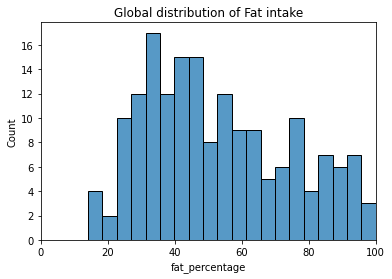

In [25]:
# fat intake distribution worldwide
fig1 = sns.histplot(x='fat_percentage', data=df_relative_percentage, stat='count', bins=20)
fig1.set(xlim=(0, 100))
fig1.set_title('Global distribution of Fat intake')

Text(0.5, 1.0, 'Global Distribution of Protein Intake')

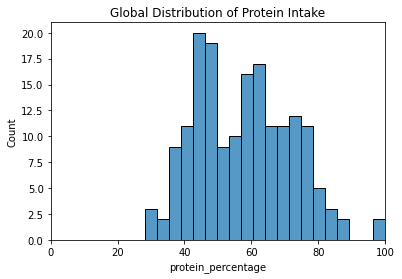

In [26]:
# protein intake distribution worldwide
fig2 = sns.histplot(x='protein_percentage', data=df_relative_percentage, stat='count', bins=20)
fig2.set(xlim=(0, 100))
fig2.set_title('Global Distribution of Protein Intake')

Text(0.5, 1.0, 'Global Distribution of Carbohydrate Intake')

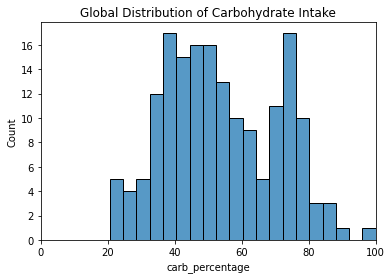

In [27]:
# carb intake distribution worldwide
fig3 = sns.histplot(x='carb_percentage', data=df_relative_percentage, stat='count', bins=20)
fig3.set(xlim=(0, 100))
fig3.set_title('Global Distribution of Carbohydrate Intake')

The three histograms are visualization of the global distribution of macronutrients (fat, protein, and carbohydrate). Each country's macronutrient intake was normalized so countries with top 5% macronutrient intake would fall under the 95-10%0 bin and countries with bottom 5% macronutrient intake would fall under 0-5% bin. Looking at the histograms, the global distribution of fat and carbohydrate intake show a positive skew. Similarly the global distribution of protein intake is symmetrically skewed. The result indicates that most countries' fat and carbohydrate intakes are significantly less than the intakes of countries that fall under the top 10% bin. The symmetrical distribution of protein intake may indicate that the data follow the normal distribution curve. 
For all three histograms there are multiple peaks; the multimodal nature of the three macronutrient's global distribution may indicate that other important variables such as covid distributions should be accounted for.

## Histogram of Worldwide Covid Distribution ##
* `x` : relative percentage ranges
* `y` : count of countries that fall under the percentage range bin

In [28]:
print('Total number of countries in the dataset: '+ str(len(df_covid['Country'])))

Total number of countries in the dataset: 170


Text(0.5, 1.0, 'Worldwide distribution of Confirmed Covid Cases')

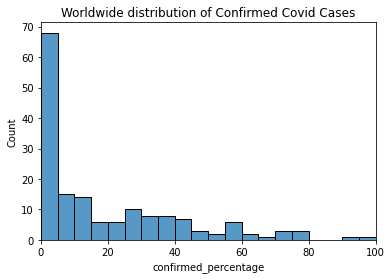

In [29]:
# covid confirmed cases distribution worldwide
# observed a strong right skew, performing a log transformation
fig4 = sns.histplot(x='confirmed_percentage', data=df_relative_percentage, stat='count', bins=20)
fig4.set(xlim=(0, 100))
fig4.set_title('Worldwide distribution of Confirmed Covid Cases') 

Text(0.5, 1.0, 'Global Distribution of Covid Deaths')

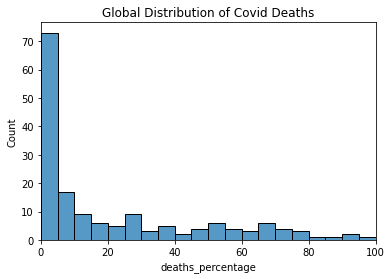

In [30]:
# covid deaths cases distribution worldwide
fig5 = sns.histplot(x='deaths_percentage', data=df_relative_percentage, stat='count', bins=20)
fig5.set(xlim=(0, 100))
fig5.set_title('Global Distribution of Covid Deaths') 

Text(0.5, 1.0, 'Global Distribution of Covid Recovery Rates')

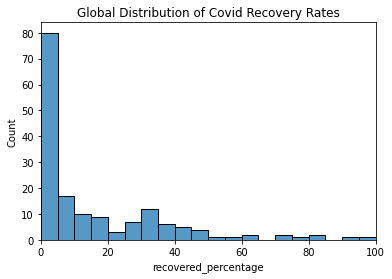

In [31]:
# covid recovered cases distribution worldwide
fig6 = sns.histplot(x='recovered_percentage', data=df_relative_percentage, stat='count', bins=20)
fig6.set(xlim=(0, 100))
fig6.set_title('Global Distribution of Covid Recovery Rates')

In the visualizations of the global distribution of covid confirmed, deaths, and recovered rates, all three histograms show positive skewness. The peak for all three data is the 0-5% bin, which could be interpreted as that because most countries have low covid confirmed rates, deaths were fewer and recovery rates could only be low since there were not many patients. Because of the peak being in the 0-5% bin, this may suggest that the three datasets have log distribution.

Below, we performed log transformations of COVID distributions.

In [32]:
# perform log transformations of COVID Distributions
df_covid['Confirmed_log'] = np.log10(df_covid['Confirmed'])
df_covid['Deaths_log'] = np.log10(df_covid['Deaths'])
df_covid['Recovered_log'] = np.log10(df_covid['Recovered'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


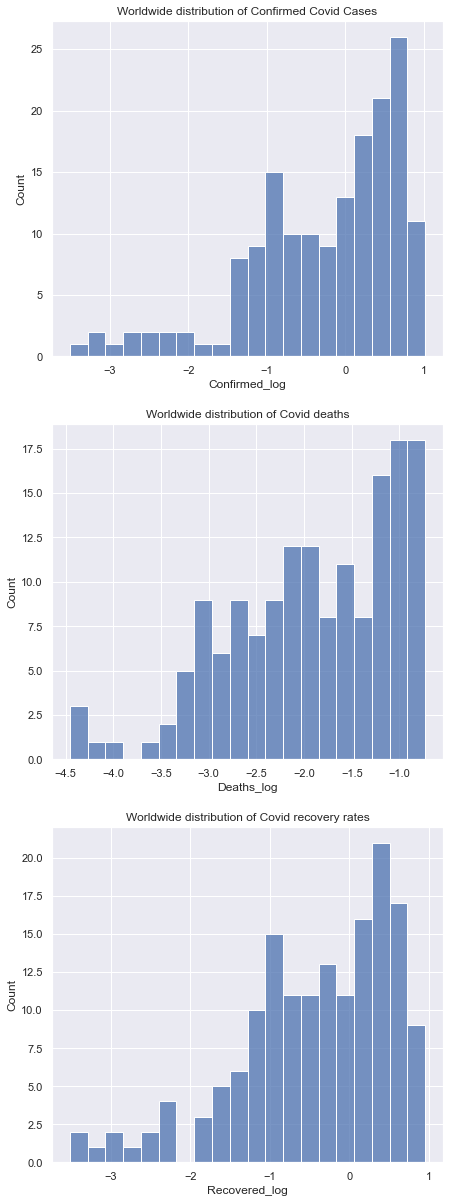

In [33]:
# replot figures with log transformation included
sns.set()
fig, axes = plt.subplots(3,1)
sns.histplot(x='Confirmed_log', data=df_covid, stat='count', bins=20, ax = axes[0])
axes[0].set_title('Worldwide distribution of Confirmed Covid Cases')
sns.histplot(x='Deaths_log', data=df_covid, stat='count', bins=20, ax = axes[1])
axes[1].set_title('Worldwide distribution of Covid deaths')
sns.histplot(x='Recovered_log', data=df_covid, stat='count', bins=20, ax = axes[2])
axes[2].set_title('Worldwide distribution of Covid recovery rates')

# set subplot size
fig.set_figheight(21)
fig.set_figwidth(7)

## Is there a correlation between macronutrient consumption and COVID rates in a country? ##

In [34]:
macro_covid_combined_df = pd.merge(df_macro, df_covid)
macro_covid_combined_df = macro_covid_combined_df.rename(columns = {'Country': 'name'})
macro_covid_combined_df.head()

,name,fat_sum,protein_sum,carb_sum,Confirmed,Deaths,Recovered,Population,Confirmed_log,Deaths_log,Recovered_log
0,Afghanistan,22.34895,39.48570,652.80535,0.142134,0.006186,0.123374,38928000.0,-0.847301,-2.208606,-0.908777
1,Albania,85.87720,87.26785,2347.89495,2.967301,0.050951,1.792636,2838000.0,0.472362,-1.292844,0.253492
2,Algeria,58.17735,67.82430,1471.46835,0.244897,0.006558,0.167572,44357000.0,-0.611016,-2.183218,-0.775798
3,Angola,35.58385,39.49300,1066.82315,0.061687,0.001461,0.056808,32522000.0,-1.209803,-2.835484,-1.245593
4,Antigua and Barbuda,65.04665,59.45120,1141.85215,0.293878,0.007143,0.190816,98000.0,-0.531834,-2.146128,-0.719384


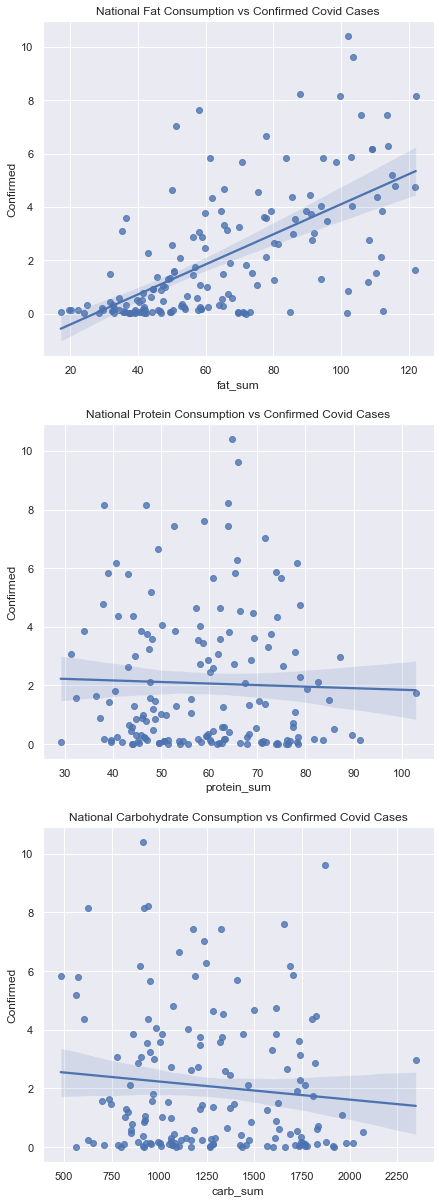

In [35]:
sns.set()
fig, axes = plt.subplots(3,1)
sns.regplot(data = macro_covid_combined_df, x = 'fat_sum', y = 'Confirmed', ax = axes[0])
axes[0].set_title('National Fat Consumption vs Confirmed Covid Cases')
sns.regplot(data = macro_covid_combined_df, x = 'protein_sum', y = 'Confirmed', ax = axes[1])
axes[1].set_title('National Protein Consumption vs Confirmed Covid Cases')
sns.regplot(data = macro_covid_combined_df, x = 'carb_sum', y = 'Confirmed', ax = axes[2])
axes[2].set_title('National Carbohydrate Consumption vs Confirmed Covid Cases')

# set subplot size
fig.set_figheight(21)
fig.set_figwidth(7)

In [36]:
# Linear regression on fat consumption and covid cases
outcome_fat, predictors_fat = patsy.dmatrices('Confirmed ~ fat_sum', macro_covid_combined_df)
mod_fat = sm.OLS(outcome_fat, predictors_fat)
res_fat = mod_fat.fit()
print(res_fat.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     102.4
Date:                Sun, 05 Jun 2022   Prob (F-statistic):           7.65e-19
Time:                        23:57:10   Log-Likelihood:                -322.84
No. Observations:                 159   AIC:                             649.7
Df Residuals:                     157   BIC:                             655.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.5379      0.386     -3.986      0.0

### Remarks ###

In scatterplot for fat consumption and COVID cases, positive linear relationship can be observed using the regression line. However, for the remaining scatter plots, the linear relationships are subtle. 

In [37]:
# Linear regression on protein consumption and covid cases
outcome_protein, predictors_protein = patsy.dmatrices('Confirmed ~ protein_sum', macro_covid_combined_df)
mod_protein = sm.OLS(outcome_protein, predictors_protein)
res_protein = mod_protein.fit()
print(res_protein.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.1611
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.689
Time:                        23:57:10   Log-Likelihood:                -362.68
No. Observations:                 159   AIC:                             729.4
Df Residuals:                     157   BIC:                             735.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       2.3839      0.801      2.977      

In [38]:
# Linear regression on carbohydrate consumption and covid cases
outcome_carb, predictors_carb = patsy.dmatrices('Confirmed ~ carb_sum', macro_covid_combined_df)
mod_carb = sm.OLS(outcome_carb, predictors_carb)
res_carb = mod_carb.fit()
print(res_carb.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.625
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.204
Time:                        23:57:10   Log-Likelihood:                -361.94
No. Observations:                 159   AIC:                             727.9
Df Residuals:                     157   BIC:                             734.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8509      0.640      4.457      0.0

### Remarks ###
The results of the linear regression analysis verify the scatterplot observation that there is a statistically signficant relationships between fat consumption and COVID cases. The 95% confidence interval for the coefficient of its regression line does not include 0. 

Linear regression analysis also suggest that there are not statistically signficant relationships between protein consumption and COVID cases, and carbohydrate consumption and COVID cases. We can see that the 95% confidence interval for their coefficients include 0. 

## Geospatial Analysis ##

In [39]:
# download/import necessary packages
# !pip install descartes
import matplotlib
import geopandas as gpd
import descartes

In [40]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world.sort_values('name')

In [41]:
world = pd.merge(world, macro_covid_combined_df, on='name')

<AxesSubplot:>

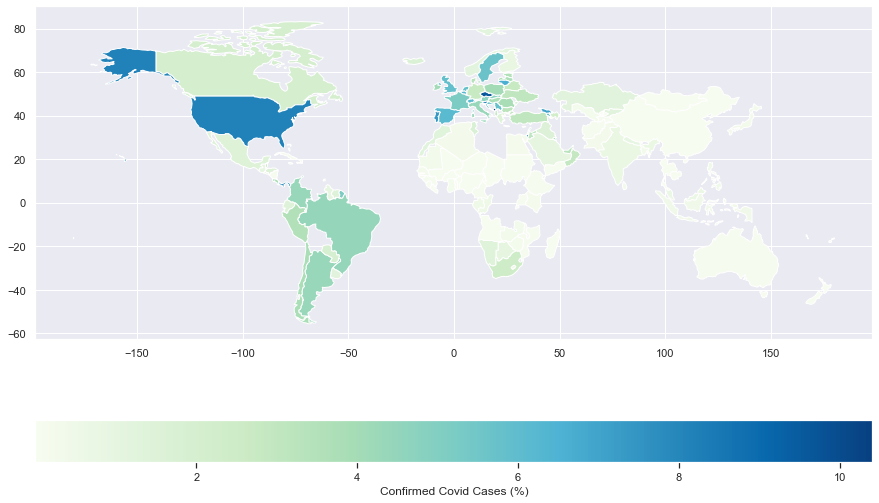

In [42]:
# visualization for Covid cases
world.plot(column = 'Confirmed', cmap = 'GnBu', legend = True, legend_kwds = {'label': 'Confirmed Covid Cases (%)', 'orientation': 'horizontal'}, figsize = (15,10))

<AxesSubplot:>

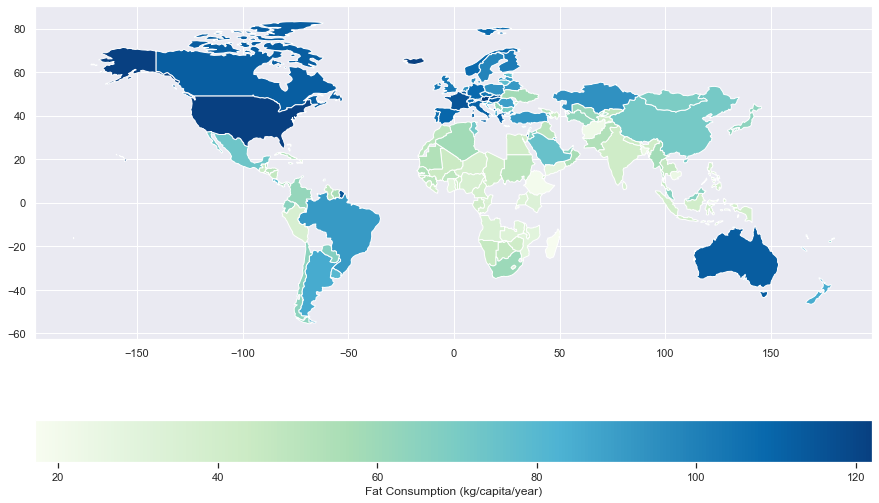

In [43]:
# Visualize fat consumption 
world.plot(column = 'fat_sum', cmap = 'GnBu', legend = True, legend_kwds={'label': "Fat Consumption (kg/capita/year)",'orientation': 'horizontal'}, figsize = (15,10))

<AxesSubplot:>

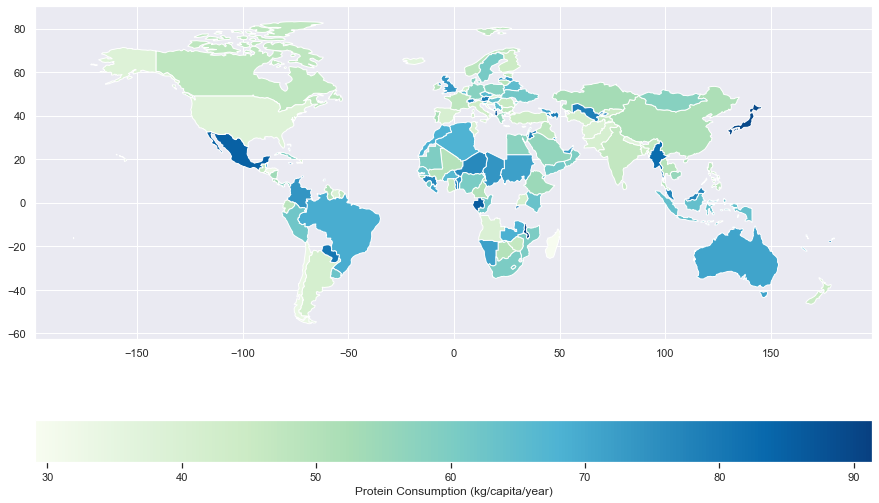

In [44]:
# Visualize protein consumption 
world.plot(column = 'protein_sum', cmap = 'GnBu', legend = True, legend_kwds={'label': "Protein Consumption (kg/capita/year)",'orientation': 'horizontal'}, figsize = (15,10))

<AxesSubplot:>

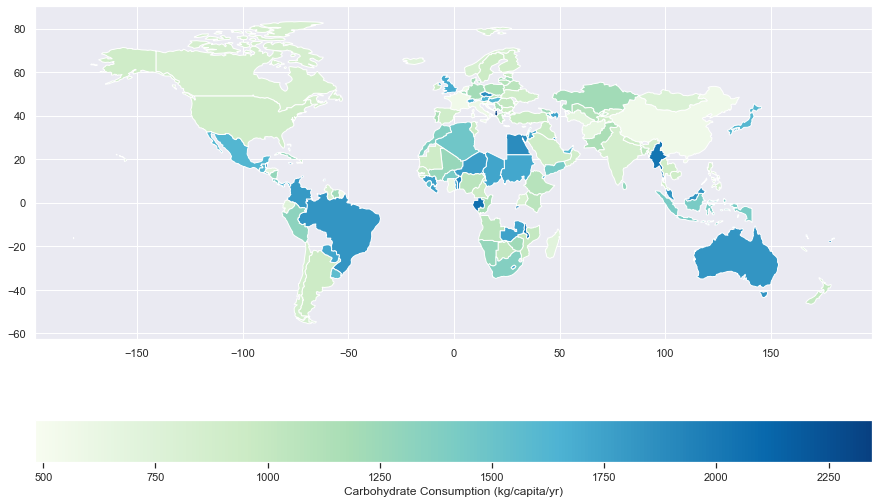

In [45]:
# Visualize carbohydrate consumption 
world.plot(column = 'carb_sum', cmap = 'GnBu', legend = True, legend_kwds={'label': "Carbohydrate Consumption (kg/capita/yr)",'orientation': 'horizontal'}, figsize = (15,10))

## Health Score ##

To determine whether diet quality(which will be quantified by degree of similarity to macronutrient guidelines) is correlated with COVID rates

According to the IOM, "The acceptable macronutrient distribution ranges (AMDR) are 45–65% of your daily calories from carbs, 20–35% from fats and 10–35% from protein".[^7]

[^7]: https://pubmed.ncbi.nlm.nih.gov/16004827/

In [46]:
#since the guidlines provide a range, the midpoint of the ranges will be used for comparison.
rec_carbs=(45+65)/2
rec_fat=(35+20)/2
rec_protein=(35+10)/2

#data in df_macro represent the consumption of each macronutrient in terms of kg/capita/year.
#However, the guidelines are in terms of %daily calories.
#data in df_macro need to be converted to kcal/capita/year 
#https://www.nal.usda.gov/legacy/fnic/how-many-calories-are-one-gram-fat-carbohydrate-or-protein

kcal_per_kg_carbs=4000
kcal_per_kg_fat=9000
kcal_per_kg_protein=9000

df_macro_kcal=df_macro.assign(fat_kcal=df_macro['fat_sum']*kcal_per_kg_fat, 
                              carb_kcal=df_macro['carb_sum']*kcal_per_kg_carbs, 
                              protein_kcal=df_macro['protein_sum']*kcal_per_kg_protein)

df_macro_kcal=df_macro_kcal.assign(total_kcal=df_macro_kcal[['fat_kcal','carb_kcal','protein_kcal']].sum(axis=1))


df_macro_kcal=df_macro_kcal.assign(fat_percent=100*df_macro_kcal['fat_kcal']/df_macro_kcal['total_kcal'], 
                              carb_percent=100*df_macro_kcal['carb_kcal']/df_macro_kcal['total_kcal'], 
                              protein_percent=100*df_macro_kcal['protein_kcal']/df_macro_kcal['total_kcal'])

#remove irrelevant columns
df_macro_kcal=df_macro_kcal.drop(columns=['fat_sum','protein_sum','carb_sum'])

df_macro_kcal.head()

,Country,fat_kcal,carb_kcal,protein_kcal,total_kcal,fat_percent,carb_percent,protein_percent
0,Afghanistan,201140.55,2611221.4,355371.30,3167733.25,6.349668,82.431859,11.218473
1,Albania,772894.80,9391579.8,785410.65,10949885.25,7.058474,85.768751,7.172775
2,Algeria,523596.15,5885873.4,610418.70,7019888.25,7.458753,83.845685,8.695561
3,Angola,320254.65,4267292.6,355437.00,4942984.25,6.478974,86.330289,7.190737
4,Antigua and Barbuda,585419.85,4567408.6,535060.80,5687889.25,10.292392,80.300590,9.407019


In [47]:
#compare with guidelines; negative differences = x% lower than guidelines

df_macro_kcal=df_macro_kcal.assign(carb_diff=df_macro_kcal['carb_percent']-rec_carbs,
                                   fat_diff=df_macro_kcal['fat_percent']-rec_fat,
                                   protein_diff=df_macro_kcal['protein_percent']-rec_protein)                       

#calculate health score; absolute values because we are concerned about how closely guidelines are followed
#the lower the score, the 'healthier' the diet
def healthscore(carb_diff,fat_diff,protein_diff):
    carb_score=abs(carb_diff)
    fat_score=abs(fat_diff)
    protein_score=abs(protein_diff)
    return carb_score+fat_score+protein_score

df_macro_kcal=df_macro_kcal.assign(health_score=df_macro_kcal.apply(lambda row: healthscore(row['carb_diff'],
                                                                              row['fat_diff'],
                                                                              row['protein_diff']),axis=1))

df_macro_kcal.head()



,Country,fat_kcal,carb_kcal,protein_kcal,total_kcal,fat_percent,carb_percent,protein_percent,carb_diff,fat_diff,protein_diff,health_score
0,Afghanistan,201140.55,2611221.4,355371.30,3167733.25,6.349668,82.431859,11.218473,27.431859,-21.150332,-11.281527,59.863718
1,Albania,772894.80,9391579.8,785410.65,10949885.25,7.058474,85.768751,7.172775,30.768751,-20.441526,-15.327225,66.537502
2,Algeria,523596.15,5885873.4,610418.70,7019888.25,7.458753,83.845685,8.695561,28.845685,-20.041247,-13.804439,62.691370
3,Angola,320254.65,4267292.6,355437.00,4942984.25,6.478974,86.330289,7.190737,31.330289,-21.021026,-15.309263,67.660578
4,Antigua and Barbuda,585419.85,4567408.6,535060.80,5687889.25,10.292392,80.300590,9.407019,25.300590,-17.207608,-13.092981,55.601179


In [48]:
print("Maximum health score:")
df_macro_kcal[df_macro_kcal.get('health_score')== max(df_macro_kcal['health_score'])]

Maximum health score:


,Country,fat_kcal,carb_kcal,protein_kcal,total_kcal,fat_percent,carb_percent,protein_percent,carb_diff,fat_diff,protein_diff,health_score
126,Rwanda,180675.0,7915094.6,752232.15,8848001.75,2.041986,89.456296,8.501718,34.456296,-25.458014,-13.998282,73.912591


In [49]:
print("Minimum health score:")
df_macro_kcal[df_macro_kcal.get('health_score')== min(df_macro_kcal['health_score'])]

Minimum health score:


,Country,fat_kcal,carb_kcal,protein_kcal,total_kcal,fat_percent,carb_percent,protein_percent,carb_diff,fat_diff,protein_diff,health_score
53,France,1035891.9,2242414.8,431254.8,3709561.5,27.924915,60.449592,11.625493,5.449592,0.424915,-10.874507,16.749015


### Health Score Distributions ###

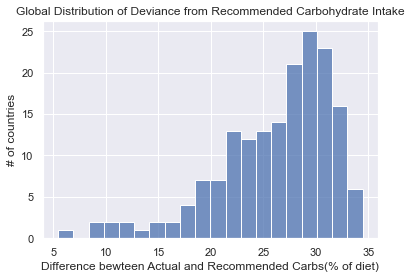

In [50]:
#What distribution do the carb differences take on?

fig_carb_score = sns.histplot(x='carb_diff', data=df_macro_kcal, stat='count', bins=20)
fig_carb_score.set_title('Global Distribution of Deviance from Recommended Carbohydrate Intake')
fig_carb_score.set(xlabel='Difference bewteen Actual and Recommended Carbs(% of diet)', ylabel='# of countries');

All nations in the dataset consume a higher percentage of carbohydrates than recommended. The distribution is left skewed.

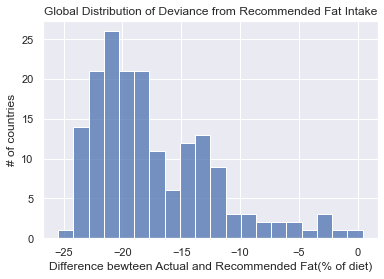

In [51]:
#What distribution do the fat differences take on?
fig_fat_score = sns.histplot(x='fat_diff', data=df_macro_kcal, stat='count', bins=20)
fig_fat_score.set_title('Global Distribution of Deviance from Recommended Fat Intake')
fig_fat_score.set(xlabel='Difference bewteen Actual and Recommended Fat(% of diet)', ylabel='# of countries');

The distribution is right skewed; most nations roughly adhere to guideline fat%.

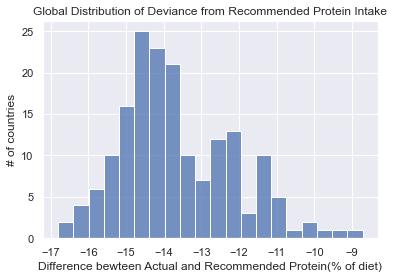

In [52]:
#What distribution do the protein differences take on?
fig_protein_score = sns.histplot(x='protein_diff', data=df_macro_kcal, stat='count', bins=20)
fig_protein_score.set_title('Global Distribution of Deviance from Recommended Protein Intake')
fig_protein_score.set(xlabel='Difference bewteen Actual and Recommended Protein(% of diet)', ylabel='# of countries');

The distribution is symetrically skewed.

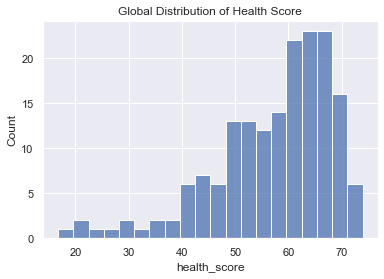

In [53]:
#What distribution do the overall### Is there a correlation between diet health score and COVID rates in a country? ### health scores take on?

fig_health_score = sns.histplot(x='health_score', data=df_macro_kcal, stat='count', bins=20)
fig_health_score.set_title('Global Distribution of Health Score')
fig_protein_score.set(xlabel='Diet Health Score', ylabel='# of countries');

Health scores among countries are quite evenly distributed about the mean of ~33.

### Is there a correlation between diet health score and COVID rates in a country? ###

In [54]:
# combine health score dataframe with COVID dataframe
kcal_covid_combined_df=pd.concat([df_macro_kcal, df_covid], axis=1)
kcal_covid_combined_df.head()

,Country,fat_kcal,carb_kcal,protein_kcal,total_kcal,fat_percent,carb_percent,protein_percent,carb_diff,fat_diff,protein_diff,health_score,Country,Confirmed,Deaths,Recovered,Population,Confirmed_log,Deaths_log,Recovered_log
0,Afghanistan,201140.55,2611221.4,355371.30,3167733.25,6.349668,82.431859,11.218473,27.431859,-21.150332,-11.281527,59.863718,Afghanistan,0.142134,0.006186,0.123374,38928000.0,-0.847301,-2.208606,-0.908777
1,Albania,772894.80,9391579.8,785410.65,10949885.25,7.058474,85.768751,7.172775,30.768751,-20.441526,-15.327225,66.537502,Albania,2.967301,0.050951,1.792636,2838000.0,0.472362,-1.292844,0.253492
2,Algeria,523596.15,5885873.4,610418.70,7019888.25,7.458753,83.845685,8.695561,28.845685,-20.041247,-13.804439,62.691370,Algeria,0.244897,0.006558,0.167572,44357000.0,-0.611016,-2.183218,-0.775798
3,Angola,320254.65,4267292.6,355437.00,4942984.25,6.478974,86.330289,7.190737,31.330289,-21.021026,-15.309263,67.660578,Angola,0.061687,0.001461,0.056808,32522000.0,-1.209803,-2.835484,-1.245593
4,Antigua and Barbuda,585419.85,4567408.6,535060.80,5687889.25,10.292392,80.300590,9.407019,25.300590,-17.207608,-13.092981,55.601179,Antigua and Barbuda,0.293878,0.007143,0.190816,98000.0,-0.531834,-2.146128,-0.719384


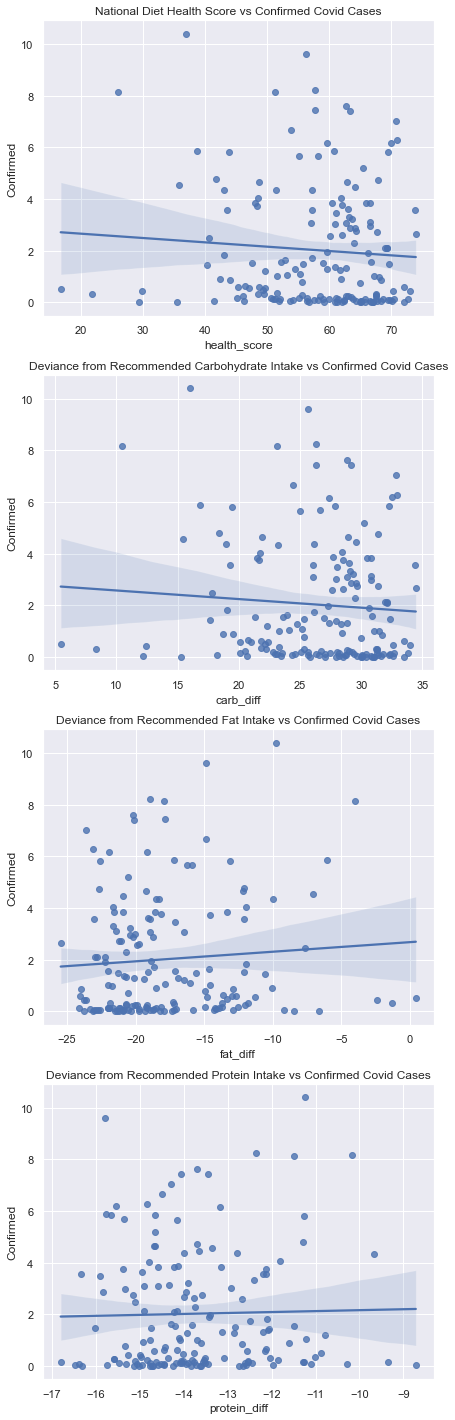

In [55]:
#visualize relationship bewteen scores and COVID rrates
sns.set()
fig, axes = plt.subplots(4,1)
sns.regplot(data = kcal_covid_combined_df, x = 'health_score', y = 'Confirmed', ax = axes[0])
axes[0].set_title('National Diet Health Score vs Confirmed Covid Cases')
sns.regplot(data = kcal_covid_combined_df, x = 'carb_diff', y = 'Confirmed', ax = axes[1])
axes[1].set_title('Deviance from Recommended Carbohydrate Intake vs Confirmed Covid Cases')
sns.regplot(data = kcal_covid_combined_df, x = 'fat_diff', y = 'Confirmed', ax = axes[2])
axes[2].set_title('Deviance from Recommended Fat Intake vs Confirmed Covid Cases')
sns.regplot(data = kcal_covid_combined_df, x = 'protein_diff', y = 'Confirmed', ax = axes[3])
axes[3].set_title('Deviance from Recommended Protein Intake vs Confirmed Covid Cases')

# set subplot size
fig.set_figheight(25)
fig.set_figwidth(7)

The following relationships can be observed in the 4 scatterplots above based on the regression line:
* National Diet Health Score vs Confirmed Covid Cases: subtle negative linear relationship
* Deviance from Recommended Carbohydrate Intake vs Confirmed Covid Cases: subtle negative linear relationship
* Deviance from Recommended Fat Intake vs Confirmed Covid Cases: subtle positive linear relationship
* Deviance from Recommended Protein Intake vs Confirmed Covid Cases: subtle positive linear relationship


In [56]:
# Linear regression on health score and covid cases
outcome_score, predictors_score = patsy.dmatrices('Confirmed ~ health_score', kcal_covid_combined_df)
mod_score = sm.OLS(outcome_score, predictors_score)
res_score = mod_score.fit()
print(res_score.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9417
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.333
Time:                        23:57:16   Log-Likelihood:                -372.58
No. Observations:                 164   AIC:                             749.2
Df Residuals:                     162   BIC:                             755.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.9944      1.019      2.939   

In [57]:
# Linear regression on carbohydrate differences and covid cases
outcome_carb_diff, predictors_carb_diff = patsy.dmatrices('Confirmed ~ carb_diff', kcal_covid_combined_df)
mod_carb_diff = sm.OLS(outcome_carb_diff, predictors_carb_diff)
res_carb_diff = mod_carb_diff.fit()
print(res_carb_diff.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9304
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.336
Time:                        23:57:16   Log-Likelihood:                -372.59
No. Observations:                 164   AIC:                             749.2
Df Residuals:                     162   BIC:                             755.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9033      0.932      3.115      0.0

In [58]:
# Linear regression on fat differences and covid cases
outcome_fat_diff, predictors_fat_diff = patsy.dmatrices('Confirmed ~ fat_diff', kcal_covid_combined_df)
mod_fat_diff = sm.OLS(outcome_fat_diff, predictors_fat_diff)
res_fat_diff = mod_fat_diff.fit()
print(res_fat_diff.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9469
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.332
Time:                        23:57:16   Log-Likelihood:                -372.58
No. Observations:                 164   AIC:                             749.2
Df Residuals:                     162   BIC:                             755.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6805      0.701      3.822      0.0

In [59]:
# Linear regression on protein differences and covid cases
outcome_protein_diff, predictors_protein_diff = patsy.dmatrices('Confirmed ~ protein_diff', kcal_covid_combined_df)
mod_protein_diff = sm.OLS(outcome_protein_diff, predictors_protein_diff)
res_protein_diff = mod_protein_diff.fit()
print(res_protein_diff.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                   0.08776
Date:                Sun, 05 Jun 2022   Prob (F-statistic):              0.767
Time:                        23:57:16   Log-Likelihood:                -373.01
No. Observations:                 164   AIC:                             750.0
Df Residuals:                     162   BIC:                             756.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.5217      1.697      1.486   

The results of the linear regression analysis suggest that:
1. There is not a statistically signficant relationship between health scores and COVID cases. 

2. There is not statistically signficant relationship between deviance from carbohydrate guidelines and COVID cases.

3. There is not statistically signficant relationship between deviance from fat guidelines and COVID cases.

4. There is not a statistically signficant relationship between deviance from protein guidelines and COVID cases.

 We can see that the 95% confidence interval for all four coefficients include 0.

## Is there a correlation beteween Kcals consumed and COVID rates? ##

We hypothesized that Kcal would be the most accurate predictor of COVID rates in a country based on the assumption that a high calorie diet is generally unhealthy. Does the data support our assumptions?

We already approximated Kcals/capita/year for each country when computing health scores

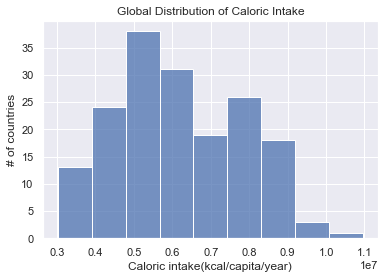

In [63]:
#What distribution do the kcal/capital/year take on?

fig_carb_score = sns.histplot(x='total_kcal', data=df_macro_kcal, stat='count')
fig_carb_score.set_title('Global Distribution of Yearly Caloric Intake')
fig_carb_score.set(xlabel='Caloric intake(kcal/capita/year)', ylabel='# of countries');

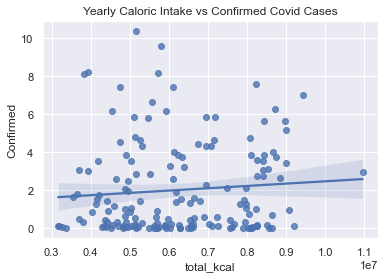

In [69]:
#visualize relationship bewteen yearly caloric intake and COVID rates
fig_kcal=sns.regplot(data = kcal_covid_combined_df, x = 'total_kcal', y = 'Confirmed')
fig_kcal.set_title('Yearly Caloric Intake vs Confirmed Covid Cases');

In [70]:
# Linear regression on caloric intake and Covid cases
outcome_kcal, predictors_kcal = patsy.dmatrices('Confirmed ~ total_kcal', kcal_covid_combined_df)
mod_kcal = sm.OLS(outcome_kcal, predictors_kcal)
res_kcal = mod_kcal.fit()
print(res_kcal.summary())

                            OLS Regression Results                            
Dep. Variable:              Confirmed   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.172
Date:                Mon, 06 Jun 2022   Prob (F-statistic):              0.281
Time:                        00:06:25   Log-Likelihood:                -372.47
No. Observations:                 164   AIC:                             748.9
Df Residuals:                     162   BIC:                             755.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2611      0.726      1.736      0.0

## Building models to predict COVID confirmed rates base on macro nutrients or 23 sub food types

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import sklearn.neighbors as skn
import scipy.stats as stats

ModuleNotFoundError: No module named 'sklearn'

#### Check to see if we can builf a linear model with multiple independent variable.

In [ ]:
df_covid.columns = ['country','confirmed','deaths','recovered','population', 'Confirmed_log', 'Deaths_log', 'Recovered_log']

In [ ]:
df_quantity.head(2)

In [ ]:
df_quantity = pd.merge(df_quantity,df_covid,on ='country', how='right') # join on right since the covid rates are es
df_macro = pd.merge(df_macro,df_covid,on ='country', how='right') # join on right since the covid rates are essential for further analysis, so we don't want NA in the covid rates column

### drop NA before running models
df_covid = df_covid.dropna()
df_quantity = df_quantity.dropna()
df_macro = df_macro.dropna()

## -log transform the confirmed rate; 
## since in the original df, the confirmend is already in rates (ex: 0.132 means 0.132% instead of 13.2%), divide by 100 before log transform 
df_macro['logConfirmed'] = -np.log(df_macro['confirmed'] / 100)
df_quantity['logConfirmed'] = -np.log(df_quantity['confirmed'] / 100)

In [ ]:
## since we have multiple regression variables, we need to check for multicollinearity using VIF

# the independent variables set
X = df_macro[['fat_sum','protein_sum','carb_sum']]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print("The multicollinearity for the macros model is:")
print(vif_data)

In [ ]:
# the independent variables set
X = df_quantity[df_quantity.columns[1:24]]
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print("The multicollinearity for the quantity of 23 food types model is:") 
print(vif_data)

We can see for both models, most independent variable are multicollinear with other independent variables (VIF > 5 means multicollinearity), so we can't really use linear regression models. Instead, we should use KNN regressor to build our model, which will give us a non-parametric mode that won't be affected by multicollinearity.

#### KNN model for macros (KNN-3m)

In [ ]:
def flat(l):
    return [item for sublist in l for item in sublist]

In [ ]:
# get training and testing dataset
X = df_macro[['fat_sum','protein_sum','carb_sum']].values
X = X.astype(float)
y = df_macro[['logConfirmed']].values

# randomly split the dataset to training and testing
shuffle = np.random.permutation(len(y))
num = int(0.8*len(shuffle))
train, test = shuffle[:num],shuffle[num:]

X_train = X[train,:]
y_train = y[train,:]
X_test = X[test,:]
y_test = y[test,:]

# fit
neigh = skn.KNeighborsRegressor(n_neighbors=7)
neigh.fit(X_train, y_train)

# use model to predict results
y_pred_train = flat(neigh.predict(X_train).tolist())
y_pred_test = flat(neigh.predict(X_test).tolist())

# conbine the actual result and predicted result into dataframes
df_train = pd.DataFrame({'log_actual_confirmed': flat(y_train), 'log_pred_confirmed': y_pred_train})
df_test = pd.DataFrame({'log_actual_confirmed': flat(y_test), 'log_pred_confirmed': y_pred_test})

In [ ]:
# show the result
corr, p = stats.pearsonr(df_train['log_actual_confirmed'], df_train['log_pred_confirmed'])
print("For the train set, the correlation coefficent between the predicted rate and the acutal rate is:", corr, "with p-val of", p)
sns.regplot(x='log_actual_confirmed', y='log_pred_confirmed', data=df_train,truncate=False)

#### KNN model for total quality of 23 food subtypes (KNN-23s)

In [ ]:
X = df_quantity[df_quantity.columns[1:24]].values
X = X.astype(float)
y = df_quantity[['logConfirmed']].values


# randomly split the dataset to training and testing
shuffle = np.random.permutation(len(y))
num = int(0.8*len(shuffle))
train, test = shuffle[:num],shuffle[num:]

X_train = X[train,:]
y_train = y[train,:]
X_test = X[test,:]
y_test = y[test,:]

# fit
neigh = skn.KNeighborsRegressor(n_neighbors=7)
neigh.fit(X_train, y_train)

# use model to predict results
y_pred_train = flat(neigh.predict(X_train).tolist())
y_pred_test = flat(neigh.predict(X_test).tolist())

# conbine the actual result and predicted result into dataframes
df_train = pd.DataFrame({'log_actual_confirmed': flat(y_train), 'log_pred_confirmed': y_pred_train})
df_test = pd.DataFrame({'log_actual_confirmed': flat(y_test), 'log_pred_confirmed': y_pred_test})

In [ ]:
# show the result
corr, p = stats.pearsonr(df_train['log_actual_confirmed'], df_train['log_pred_confirmed'])
print("For the train set, the correlation coefficent between the predicted rate and the acutal rate is:", corr, "with p-val of", p)
sns.regplot(x='log_actual_confirmed', y='log_pred_confirmed', data=df_train,truncate=False)

In [ ]:
corr, p = stats.pearsonr(df_test['log_actual_confirmed'], df_test['log_pred_confirmed'])
print("For the test set, he correlation coefficent between the predicted rate and the acutal rate is:", corr, "with p-val of", p)
sns.regplot(x='log_actual_confirmed', y='log_pred_confirmed', data=df_test,truncate=False)

By comparing the predicted confirmed rates outputted by the 2 KNN models and the actual confirmed rates, we can see that the KNN model that uses the total quality of 23 food subtypes as independent variables is more accurate than the KNN model that uses 3 macros as indepedent variables; the correlation between the actual covid rate and covid rate predicted by KNN-23s is high (around 0.7 for both training and testing dataset). Therefore we can conclude that food composition can be used to predict covid rates.

# Ethics & Privacy

The dataset for food supply, nutrition values, obesity, and undernourished percentages were collected from United Nations Food and Agricultural Organizations website; the dataset for population count were collected from Population Reference Bureau; the dataset for COVID-19 cases were collected from Johns Hopkins Center for Systems Science and Engineering website. Because all dataset are de-identified and are collected from global organizations, there is no exposure of personally identifiable information nor terms of use issues as well as no collection bias.

However, dataset bias may be present due to imbalance of population data for each country. Such issues should be able to be resolved through normalization of data per country (e.g. using proportions) before and during the analysis. This will secure equitable analysis and fairness across groups.

# Conclusion & Discussion

We don't have carbohydrate supply data and are calculating carbohydrate intake by substracting total quantity by fat and protein quantity; this isn't very accurate, which may be the cause for KNN macro models not being accurate.

Health score: 

# Team Contributions

*Specify who in your group worked on which parts of the project.*